In [1]:
## import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#. Read the DataSet
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
#. Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
#. Describe the numeric data
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
#. Missing Values understanding
df.isnull().sum().sort_values(ascending=False)

arpu_3g_6            74846
night_pck_user_6     74846
total_rech_data_6    74846
arpu_2g_6            74846
max_rech_data_6      74846
                     ...  
max_rech_amt_7           0
max_rech_amt_6           0
total_rech_amt_9         0
total_rech_amt_8         0
sep_vbc_3g               0
Length: 226, dtype: int64

In [6]:
#. Find the Percentage of Missing Values of Every Column
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
missing_percent.round(2)

arpu_3g_6            74.85
night_pck_user_6     74.85
total_rech_data_6    74.85
arpu_2g_6            74.85
max_rech_data_6      74.85
                     ...  
max_rech_amt_7        0.00
max_rech_amt_6        0.00
total_rech_amt_9      0.00
total_rech_amt_8      0.00
sep_vbc_3g            0.00
Length: 226, dtype: float64

In [7]:
#. Drop the Columns those who have more than 40% missing values 
drop_40_missing = missing_percent[missing_percent>40].index
df = df.drop(columns=drop_40_missing)
df.shape

(99999, 186)

In [8]:
#. Understand the Data after droping the columns who have more than 40% missing values 
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


In [9]:
#. Check the data after dropping more than 40% missing values. 
df.shape

(99999, 186)

In [10]:
# Delete the Date Columns because there are no importance of the date columns in our analsys
date_col = df.columns[df.columns.str.contains('date')]
df = df.drop(date_col, axis=1)

In [11]:
# Drop the Circle column
df= df.drop('circle_id', axis=1)

In [12]:
#. Check the data after dropping Date an Circle ID columns. 
df.shape

(99999, 177)

In [13]:
#. Filter High Value Customer who rechared in good phase 
df['Avg_Rec_Good_Phase'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [14]:
#. Find out the 70th quantile of good phase and create a variable namely X.
X = df.Avg_Rec_Good_Phase.quantile(0.7)
X

368.5

In [15]:
#. Find out and assing the values of Average Recharge in Good Phase which is more than X (0.70 quantile)
df = df[df['Avg_Rec_Good_Phase']>=X]
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_Rec_Good_Phase
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [16]:
#. Check the data after assigning 0.70 quantile. 
df.shape

(30011, 178)

In [17]:
#. Handling Missing Value Rows 
Missing_row = df[(df.isna().sum(axis=1))>(len(df.columns)//2)] 
Missing_row.shape

(114, 178)

In [18]:
#. Dropping missing value rows. 
df = df.drop(Missing_row.index)
df.shape

(29897, 178)

In [19]:
# Tag churners
df['churn'] = ((df['total_ic_mou_9'] == 0) & 
               (df['total_og_mou_9'] == 0) & 
               (df['vol_2g_mb_9'] == 0) & 
               (df['vol_3g_mb_9'] == 0)).astype(int)

In [20]:
#. Drop all the columns who ended with _9
df_9_drop = df.columns[df.columns.str.contains('_9')]
df = df.drop(df_9_drop, axis=1)
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_Rec_Good_Phase,churn
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


In [21]:
#. Check the data set after dropping all the columns who ended with _9
df.shape

(29897, 137)

In [22]:
#. Dropping all the rows who have missing values. 
df = df.dropna()

In [23]:
#. Again check and confirm that there is no missing values. 
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
missing_percent.round(2)

mobile_number       0.0
isd_ic_mou_6        0.0
total_ic_mou_6      0.0
total_ic_mou_7      0.0
total_ic_mou_8      0.0
                   ... 
std_og_t2f_mou_6    0.0
std_og_t2m_mou_8    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_6    0.0
churn               0.0
Length: 137, dtype: float64

In [24]:
#. Finnaly there is no missing value and check the dataset how many rows and columns are left after treatment of missing values. 
df.shape

(28861, 137)

In [25]:
#. Drop sep_vbc_3g column. 
df = df.drop('sep_vbc_3g', axis=1)

In [26]:
#. Check the dataset how many percent of dataset lots in missing value treatment. 
round((1- (len(df.index)/30011)),2)

0.04

In [27]:
#. check the percentage of churn rate. 
round(100*(df['churn'].mean()),2)

6.26

In [28]:
#. Convert the Mobile_Number and Churn columns in category types. 
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [29]:
#. Confirm the data type of Mobile_Number and Churn Columns. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28861 entries, 7 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 30.2+ MB


In [30]:
#. list of numeric columns
numeric_columns = df.select_dtypes(exclude=['object']).columns
numeric_columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'Avg_Rec_Good_Phase'],
      dtype='object', length=134)

In [31]:
#. Check the how many numeric colums are available in dataset. 
len(numeric_columns)

134

In [32]:
#. Removing outliers below 10th and above 90th percentile
for col in numeric_columns:
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df1 = df.loc[(df[col]> range_low) & (df[col]< range_high)]
df1.shape

(28563, 136)

In [33]:
# List the columns of total mou, rech_num and rech_amt
[total for total in df1.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [34]:
# Total mou at good phase incoming and outgoing
df1['total_mou_good'] = (df1['total_og_mou_6'] + df1['total_ic_mou_6'])

In [35]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
df1['avg_mou_action'] = (df1['total_og_mou_7'] + df1['total_og_mou_8'] + df1['total_ic_mou_7'] + df1['total_ic_mou_8'])/2

In [36]:
# Difference avg_mou_good and avg_mou_action
df1['diff_mou'] = df1['avg_mou_action'] - df1['total_mou_good']

In [37]:
# Checking whether the mou has decreased in action phase
df1['decrease_mou_action'] = np.where((df1['diff_mou'] < 0), 1, 0)

In [38]:
#. Understanding the Data
df1.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Rec_Good_Phase,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,802,57.74,19.38,18.74,1185.0,1,1113.99,973.090,-140.900,1
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667,0.00,0.00,0.00,408.0,0,1341.41,1.560,-1339.850,1


In [39]:
#. Create a column to find out average recharge number in action phase.
df1['avg_rech_num_action'] = (df1['total_rech_num_7'] + df1['total_rech_num_8'])/2

In [40]:
#. Create a column to find out difference recharge number in action phase and total recharge in 6th month.
df1['diff_rech_num']  = df1['avg_rech_num_action'] - df1['total_rech_num_6']

In [41]:
# Checking if rech_num has decreased in action phase
df1['decrease_rech_num_action'] = np.where((df1['diff_rech_num'] < 0), 1, 0)

In [42]:
# Avg rech_amt in action phase
df1['avg_rech_amt_action'] = (df1['total_rech_amt_7'] + df1['total_rech_amt_8'])/2

In [43]:
# Difference of action phase rech amt and good phase rech amt
df1['diff_rech_amt'] = df1['avg_rech_amt_action'] - df1['total_rech_amt_6']

In [44]:
# Checking if rech_amt has decreased in action phase
df1['decrease_rech_amt_action'] = np.where((df1['diff_rech_amt'] < 0), 1, 0) 

In [46]:
# ARUP in action phase
df1['avg_arpu_action'] = (df1['arpu_7'] + df1['arpu_8'])/2

In [47]:
# Difference of good and action phase ARPU
df1['diff_arpu'] = df1['avg_arpu_action'] - df1['arpu_6']

In [48]:
# Checking whether the arpu has decreased on the action month
df1['decrease_arpu_action'] = np.where(df1['diff_arpu'] < 0, 1, 0)

In [50]:
# VBC in action phase
df1['avg_vbc_3g_action'] = (df1['jul_vbc_3g'] + df1['aug_vbc_3g'])/2

In [51]:
# Difference of good and action phase VBC
df1['diff_vbc'] = df1['avg_vbc_3g_action'] - df1['jun_vbc_3g']

In [52]:
# Checking whether the VBC has decreased on the action month
df1['decrease_vbc_action'] = np.where(df1['diff_vbc'] < 0 , 1, 0)

In [53]:
#. Understand the data after creating some columns.
df1.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,0,2214.0,634.0,0,2260.6650,1191.4850,0,38.560,19.820,0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0


# EDA

In [54]:
#. Convert the Churn column data type category to int64
df1['churn'] = df1['churn'].astype('int64')

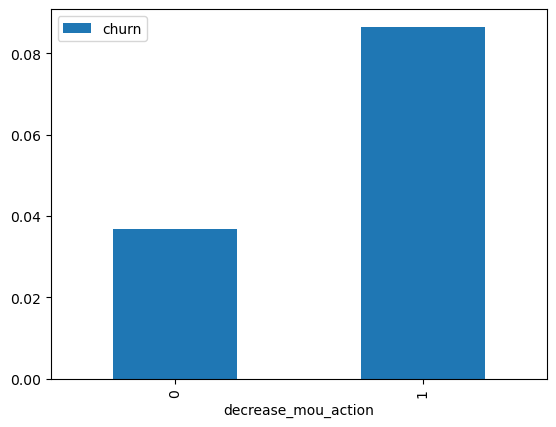

In [55]:
#. Plot the barchart on the basis of churn and decrease mou action phase. 
df1.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.show()

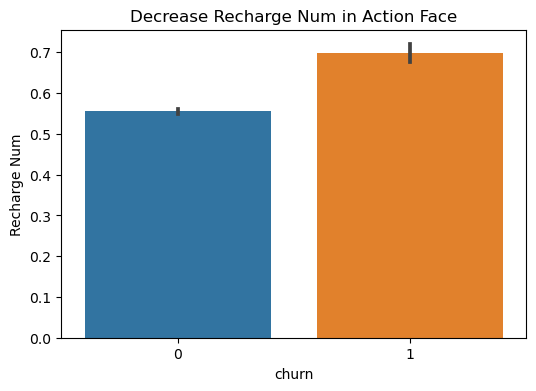

In [56]:
#. Plot the barchart on the basis of churn and decrease number in action phase.
plt.figure(figsize=(6,4))
sns.barplot(data=df1, x='churn', y='decrease_rech_num_action')
plt.title('Decrease Recharge Num in Action Face')
plt.xlabel('churn')
plt.ylabel('Recharge Num')
plt.show()

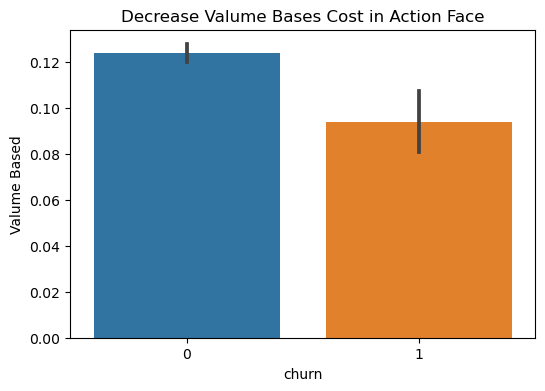

In [57]:
#. Plot the barchart on the basis of churn and Valume bases cost in action phase.
plt.figure(figsize=(6,4))
sns.barplot(data=df1, x='churn', y='decrease_vbc_action')
plt.title('Decrease Valume Bases Cost in Action Face')
plt.xlabel('churn')
plt.ylabel('Valume Based')
plt.show()

[Text(0.5, 0, 'Action phase ARPU')]

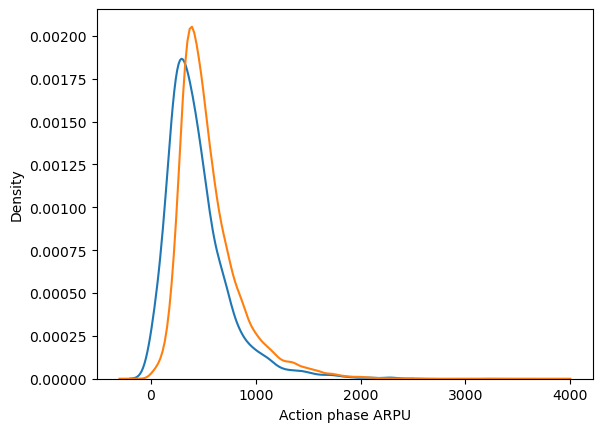

In [58]:
#. Finding Churn or not Churn on the basis of Action Phase ARPU and plot line plot. 
churn_1 = df1[df1['churn']==1]
churn_0 = df1[df1['churn']==0]

ax = sns.distplot(churn_1['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(churn_0['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

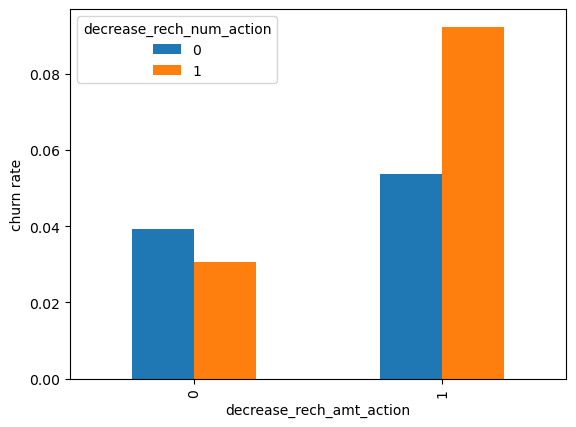

In [59]:
#. Plot the Bar Chart on the Basis of Decrease Recharge Amount and Recharge Number in Action Phase. 
df1.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

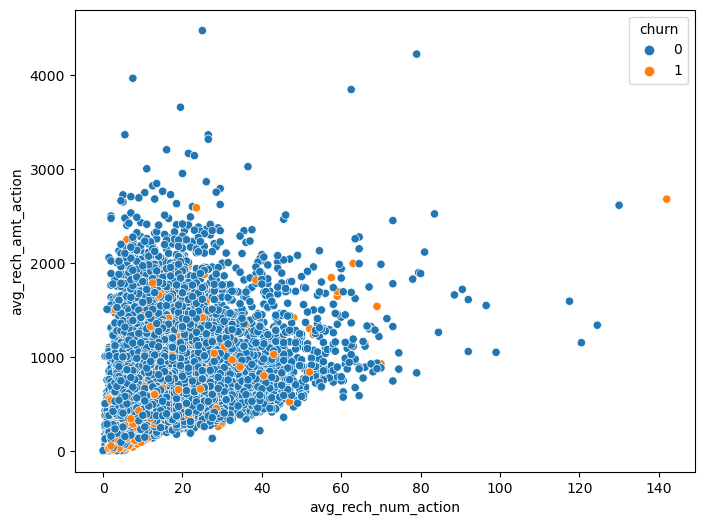

In [60]:
#. Plot the Scatter plot on the basis of Average Recharge Number and Amount in Action Phase and find out Customer Churn. 
plt.figure(figsize=(8,6))
sns.scatterplot(data=df1, x='avg_rech_num_action', y='avg_rech_amt_action', hue='churn')
plt.show()

In [61]:
#. Drop some columns which are not require for further process. 
df1 = df1.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc',], axis=1)

In [62]:
#. Understanding the data and checking how many rows and columns are available for furhter processing. 
df1.shape

(28563, 141)

In [63]:
#. Understanding the data after deleting some colums 
df1.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Rec_Good_Phase,churn,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,57.74,19.38,18.74,1185.0,1,1,0,0,0,0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,21.03,910.65,122.16,519.0,0,1,1,1,1,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,0.00,0.00,380.0,0,1,0,1,1,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,0.00,2.45,21.89,459.0,0,1,1,1,1,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,0.00,0.00,408.0,0,1,1,1,1,0


# Train Test Modeling

In [64]:
#. Assign the data for X
X = df1.drop(['mobile_number', 'churn'], axis=1)

In [65]:
#. Assign the data for Y
y = df1['churn']

In [66]:
#. Check the y data 
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [67]:
#. Understand the X data
X.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Rec_Good_Phase,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,...,802,57.74,19.38,18.74,1185.0,1,0,0,0,0
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,...,315,21.03,910.65,122.16,519.0,1,1,1,1,0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,...,2607,0.00,0.00,0.00,380.0,1,0,1,1,0
16,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,...,511,0.00,2.45,21.89,459.0,1,1,1,1,1
17,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,...,667,0.00,0.00,0.00,408.0,1,1,1,1,0


In [68]:
#. Train Test Split Using SKLearn. 
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [69]:
#. Feature Scalling 
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

X_train[['Avg_Rec_Good_Phase']] = scaler.fit_transform(X_train[['Avg_Rec_Good_Phase']])

X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Rec_Good_Phase,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
67422,0.0,0.0,0.0,581.054,889.159,1079.135,595.04,952.69,1318.96,199.46,...,930,0.00,0.00,0.0,0.560927,0,0,0,0,0
65082,0.0,0.0,0.0,830.656,1198.944,1227.029,1502.86,389.59,280.81,241.01,...,303,469.38,345.84,0.0,1.750001,1,0,0,0,0
51913,0.0,0.0,0.0,553.151,508.337,424.283,1008.91,1274.86,853.94,153.54,...,625,0.00,0.00,0.0,-0.048032,1,1,0,1,0
27073,0.0,0.0,0.0,218.348,364.955,448.334,167.58,239.81,279.51,228.19,...,2599,0.00,0.00,0.0,-0.756348,0,1,0,0,0
85427,0.0,0.0,0.0,479.138,420.189,480.141,166.06,128.16,146.96,293.23,...,806,0.00,0.00,0.0,-0.600903,1,0,0,1,0


In [71]:
### Checking the Churn Rate
churn = (sum(df1['churn'])/len(df1['churn'].index))*100
churn

6.2178342611070265

In [72]:
#. For First Training Model
import statsmodels.api as sm

In [73]:
#. Logistic Regression Model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19994
Model:                            GLM   Df Residuals:                    19864
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Aug 2024   Deviance:                       6551.4
Time:                        21:24:33   Pearson chi2:                 6.83e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1923      0.028     -6.784      0.000      -0.248      -0.137
loc_og_t2o_mou            -4.14e-10    9.7e-11     -4.269      0.000   -6.04e-10   -2.24e-10
std_og_t2o_mou            4.333e-10   1.29e-10      3.368      0.001    1.81e-10    6.85e-10
loc_ic_t2o_mou             3.47e-10   1.23e-10      2.819      0.005    1.06e-10    5.88e-10
arpu_6                   -6.955e-05      0.000     -0.207      0.836      -0.001       0.001
arpu_7                       0.0011      0.000      2.875      0.004       0.000       0.002
arpu_8                       0.0017      0.000      4.213      0.000       0.001       0.002
onnet_mou_6                  0.0046      0.010      0.456      0.648      -0.015       0.024
onnet_mou_7                  0.0033      0.007      0.515      0.607      -0.009       0.016
onnet_mou_8                 -0.0024      0.006     -0.390      0.696      -0.014       0.010
offnet_mou_6                 0.0063      0.010      0.620      0.535      -0.014       0.026
offnet_mou_7                 0.0034      0.006      0.524      0.601      -0.009       0.016
offnet_mou_8                -0.0043      0.006     -0.715      0.474      -0.016       0.008
roam_ic_mou_6                0.0007      0.000      1.527      0.127      -0.000       0.001
roam_ic_mou_7                0.0006      0.001      1.056      0.291      -0.000       0.002
roam_ic_mou_8               -0.0006      0.001     -1.058      0.290      -0.002       0.000
roam_og_mou_6               -0.0047      0.010     -0.465      0.642      -0.025       0.015
roam_og_mou_7               -0.0026      0.006     -0.406      0.685      -0.015       0.010
roam_og_mou_8                0.0039      0.006      0.643      0.520      -0.008       0.016
loc_og_t2t_mou_6            -3.1485      6.169     -0.510      0.610     -15.239       8.942
loc_og_t2t_mou_7             5.0881      6.168      0.825      0.409      -7.000      17.176
loc_og_t2t_mou_8            20.2287      6.698      3.020      0.003       7.101      33.356
loc_og_t2m_mou_6            -3.1508      6.169     -0.511      0.610     -15.242       8.940
loc_og_t2m_mou_7             5.0881      6.168      0.825      0.409      -7.000      17.176
loc_og_t2m_mou_8            20.2302      6.698      3.020      0.003       7.102      33.358
loc_og_t2f_mou_6            -3.1470      6.169     -0.510      0.610     -15.239       8.945
loc_og_t2f_mou_7             5.0779      6.168      0.823      0.410      -7.012      17.167
loc_og_t2f_mou_8            20.2328      6.698      3.021      0.003       7.104      33.361
loc_og_t2c_mou_6            -0.0014      0.005     -0.284      0.777      -0.011       0.008
loc_og_t2c_mou_7             0.0031      0.006      0.532      0.595      -0.008       0.014
loc_og_t2c_mou

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [75]:
#. Feature Selection Using RFE 
from sklearn.feature_selection import RFE
rfe = RFE(logreg)             
rfe = rfe.fit(X_train, y_train)

In [76]:
rfe.support_

array([False, False, False, False,  True,  True, False,  True,  True,
        True,  True, False,  True, False, False, False, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
        True, False,  True,  True, False,  True, False, False, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False,  True,
       False, False, False,  True,  True,  True, False, False, False,
       False, False,

In [77]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 71),
 ('std_og_t2o_mou', False, 70),
 ('loc_ic_t2o_mou', False, 69),
 ('arpu_6', False, 33),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 10),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 7),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', False, 21),
 ('roam_ic_mou_8', False, 27),
 ('roam_og_mou_6', False, 60),
 ('roam_og_mou_7', False, 41),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 9),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', False, 22),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 20),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 47),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', True, 1),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_6', False, 43),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', False, 54),
 ('std_

In [78]:
col = X_train.columns[rfe.support_]

In [79]:
X_train.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'onnet_mou_6', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6',
       'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_7',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
       'std_ic_mou_6', 'total_ic_mou_6', 'total_ic_mou_7', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_i

In [80]:
#. Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19994
Model:                            GLM   Df Residuals:                    19924
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3381.1
Date:                Tue, 06 Aug 2024   Deviance:                       6762.2
Time:                        21:25:00   Pearson chi2:                 1.47e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1224
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.6289      0.285     -2.207      0.027      -1.187      -0.070
arpu_7                       0.0014      0.000      3.757      0.000       0.001       0.002
arpu_8                       0.0012      0.000      3.029      0.002       0.000       0.002
onnet_mou_7                  0.0011      0.000      2.911      0.004       0.000       0.002
onnet_mou_8                  0.0013      0.001      1.638      0.102      -0.000       0.003
offnet_mou_6                 0.0009      0.000      1.871      0.061   -4.25e-05       0.002
offnet_mou_7                 0.0011      0.000      2.944      0.003       0.000       0.002
roam_ic_mou_6                0.0005      0.000      1.653      0.098   -9.95e-05       0.001
roam_og_mou_8                0.0001      0.001      0.263      0.793      -0.001       0.001
loc_og_t2t_mou_7             0.0002      0.001      0.378      0.705      -0.001       0.001
loc_og_t2m_mou_6            -0.0015      0.001     -2.758      0.006      -0.003      -0.000
loc_og_t2m_mou_8             0.0007      0.001      0.600      0.548      -0.002       0.003
loc_og_t2f_mou_7            -0.0112      0.005     -2.154      0.031      -0.021      -0.001
loc_og_t2f_mou_8             0.0018      0.006      0.318      0.750      -0.009       0.013
loc_og_t2c_mou_6            -0.0009      0.004     -0.219      0.827      -0.009       0.007
loc_og_t2c_mou_7             0.0052      0.004      1.309      0.190      -0.003       0.013
loc_og_t2c_mou_8             0.0075      0.007      1.092      0.275      -0.006       0.021
loc_og_mou_7                -0.0009      0.001     -1.801      0.072      -0.002    8.05e-05
std_og_t2m_mou_6            -0.0008      0.000     -1.756      0.079      -0.002    9.59e-05
std_og_t2m_mou_8             0.0014      0.001      1.687      0.092      -0.000       0.003
std_og_t2f_mou_6            -0.0061      0.006     -1.041      0.298      -0.018       0.005
std_og_t2f_mou_8            -0.0003      0.007     -0.047      0.963      -0.014       0.014
std_og_mou_7                -0.0008      0.000     -2.370      0.018      -0.002      -0.000
std_og_mou_8                 0.0007      0.001      1.257      0.209      -0.000       0.002
isd_og_mou_6                 0.0021      0.003      0.634      0.526      -0.004       0.009
isd_og_mou_7                -0.0050      0.005     -0.993      0.321      -0.015       0.005
isd_og_mou_8                 0.0061      0.004      1.663      0.096      -0.001       0.013
spl_og_mou_8                -0.0068      0.004     -1.599      0.110      -0.015       0.002
og_others_6                 -0.0220      0.017     -1.315      0.189      -0.055       0.011
total_og_mou_8              -0.0027      0.001     -2.776      0.006      -0.005      -0.001
loc_ic_t2t_mou

In [81]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

67422    0.022526
65082    0.008971
51913    0.011303
27073    0.001085
85427    0.009673
32395    0.370701
25799    0.101734
80920    0.107401
96358    0.007951
58525    0.005107
dtype: float64

In [82]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02252568, 0.00897086, 0.0113031 , 0.00108487, 0.00967302,
       0.37070107, 0.10173356, 0.10740074, 0.0079513 , 0.00510692])

In [83]:
#. Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.022526,67422
1,0,0.008971,65082
2,0,0.011303,51913
3,0,0.001085,27073
4,0,0.009673,85427


In [84]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.022526,67422,0
1,0,0.008971,65082,0
2,0,0.011303,51913,0
3,0,0.001085,27073,0
4,0,0.009673,85427,0


In [85]:
from sklearn import metrics

In [86]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18617   123]
 [ 1096   158]]


In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9390317095128539


In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
34,loc_ic_mou_8,4.098614e+09
31,loc_ic_t2m_mou_8,1.962997e+09
41,std_ic_mou_8,8.010768e+08
30,loc_ic_t2t_mou_8,7.694088e+08
37,std_ic_t2m_mou_8,3.986331e+08
...,...,...
6,roam_ic_mou_6,1.630000e+00
60,vol_3g_mb_8,1.610000e+00
27,og_others_6,1.230000e+00
13,loc_og_t2c_mou_6,1.200000e+00


In [90]:
col = col.drop('std_ic_mou_8', 1)
col

Index(['arpu_7', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_og_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_8',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_6', 'total_og_mou_8',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech

In [91]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19994
Model:                            GLM   Df Residuals:                    19925
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3381.8
Date:                Tue, 06 Aug 2024   Deviance:                       6763.6
Time:                        21:25:12   Pearson chi2:                 2.05e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1223
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.6359      0.285     -2.234      0.025      -1.194      -0.078
arpu_7                       0.0014      0.000      3.763      0.000       0.001       0.002
arpu_8                       0.0012      0.000      3.003      0.003       0.000       0.002
onnet_mou_7                  0.0011      0.000      2.912      0.004       0.000       0.002
onnet_mou_8                  0.0013      0.001      1.638      0.102      -0.000       0.003
offnet_mou_6                 0.0009      0.000      1.852      0.064   -5.16e-05       0.002
offnet_mou_7                 0.0011      0.000      2.955      0.003       0.000       0.002
roam_ic_mou_6                0.0005      0.000      1.647      0.100      -0.000       0.001
roam_og_mou_8                0.0001      0.001      0.266      0.790      -0.001       0.001
loc_og_t2t_mou_7             0.0002      0.001      0.397      0.692      -0.001       0.001
loc_og_t2m_mou_6            -0.0015      0.001     -2.732      0.006      -0.002      -0.000
loc_og_t2m_mou_8             0.0007      0.001      0.602      0.547      -0.002       0.003
loc_og_t2f_mou_7            -0.0113      0.005     -2.160      0.031      -0.021      -0.001
loc_og_t2f_mou_8             0.0017      0.006      0.294      0.769      -0.010       0.013
loc_og_t2c_mou_6            -0.0009      0.004     -0.221      0.825      -0.009       0.007
loc_og_t2c_mou_7             0.0053      0.004      1.309      0.191      -0.003       0.013
loc_og_t2c_mou_8             0.0077      0.007      1.106      0.269      -0.006       0.021
loc_og_mou_7                -0.0009      0.001     -1.815      0.070      -0.002    7.33e-05
std_og_t2m_mou_6            -0.0008      0.000     -1.738      0.082      -0.002       0.000
std_og_t2m_mou_8             0.0014      0.001      1.693      0.090      -0.000       0.003
std_og_t2f_mou_6            -0.0061      0.006     -1.035      0.300      -0.018       0.005
std_og_t2f_mou_8            -0.0006      0.007     -0.077      0.938      -0.015       0.014
std_og_mou_7                -0.0008      0.000     -2.377      0.017      -0.002      -0.000
std_og_mou_8                 0.0007      0.001      1.226      0.220      -0.000       0.002
isd_og_mou_6                 0.0021      0.003      0.633      0.526      -0.004       0.009
isd_og_mou_7                -0.0050      0.005     -1.005      0.315      -0.015       0.005
isd_og_mou_8                 0.0062      0.004      1.699      0.089      -0.001       0.013
spl_og_mou_8                -0.0071      0.004     -1.645      0.100      -0.016       0.001
og_others_6                 -0.0220      0.017     -1.315      0.188      -0.055       0.011
total_og_mou_8              -0.0027      0.001     -2.772      0.006      -0.005      -0.001
loc_ic_t2t_mou

In [92]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [93]:
y_train_pred[:10]

array([0.02348641, 0.00865899, 0.01052665, 0.0010468 , 0.00935433,
       0.36847428, 0.09854203, 0.10605441, 0.00766648, 0.00498371])

In [94]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [95]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.023486,67422,0
1,0,0.008659,65082,0
2,0,0.010527,51913,0
3,0,0.001047,27073,0
4,0,0.009354,85427,0


In [96]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9388316494948484


In [97]:
#. Let's check the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
34,loc_ic_mou_8,4.077359e+09
31,loc_ic_t2m_mou_8,1.951642e+09
30,loc_ic_t2t_mou_8,7.649579e+08
32,loc_ic_t2f_mou_8,6.237904e+07
41,total_ic_mou_8,1.513397e+07
...,...,...
6,roam_ic_mou_6,1.630000e+00
59,vol_3g_mb_8,1.610000e+00
27,og_others_6,1.230000e+00
13,loc_og_t2c_mou_6,1.200000e+00


In [98]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('loc_ic_t2t_mou_8')
col

Index(['arpu_7', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_og_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_8',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_6', 'total_og_mou_8',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_8',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_7',
       'total_rech

In [99]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19994
Model:                            GLM   Df Residuals:                    19926
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3425.0
Date:                Tue, 06 Aug 2024   Deviance:                       6850.0
Time:                        21:25:23   Pearson chi2:                 6.53e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1185
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.7495      0.284     -2.643      0.008      -1.305      -0.194
arpu_7                       0.0014      0.000      3.698      0.000       0.001       0.002
arpu_8                       0.0011      0.000      2.770      0.006       0.000       0.002
onnet_mou_7                  0.0014      0.000      3.582      0.000       0.001       0.002
onnet_mou_8                  0.0013      0.001      1.554      0.120      -0.000       0.003
offnet_mou_6                 0.0008      0.000      1.714      0.087      -0.000       0.002
offnet_mou_7                 0.0014      0.000      3.575      0.000       0.001       0.002
roam_ic_mou_6                0.0006      0.000      1.705      0.088   -8.27e-05       0.001
roam_og_mou_8                0.0003      0.001      0.612      0.541      -0.001       0.001
loc_og_t2t_mou_7             0.0001      0.001      0.279      0.780      -0.001       0.001
loc_og_t2m_mou_6            -0.0014      0.001     -2.697      0.007      -0.002      -0.000
loc_og_t2m_mou_8             0.0005      0.001      0.452      0.651      -0.002       0.003
loc_og_t2f_mou_7            -0.0124      0.005     -2.335      0.020      -0.023      -0.002
loc_og_t2f_mou_8             0.0004      0.006      0.060      0.952      -0.011       0.012
loc_og_t2c_mou_6            -0.0007      0.004     -0.165      0.869      -0.009       0.008
loc_og_t2c_mou_7             0.0050      0.004      1.281      0.200      -0.003       0.013
loc_og_t2c_mou_8             0.0100      0.007      1.436      0.151      -0.004       0.024
loc_og_mou_7                -0.0011      0.001     -2.230      0.026      -0.002      -0.000
std_og_t2m_mou_6            -0.0007      0.000     -1.583      0.113      -0.002       0.000
std_og_t2m_mou_8             0.0014      0.001      1.640      0.101      -0.000       0.003
std_og_t2f_mou_6            -0.0061      0.006     -1.031      0.303      -0.018       0.005
std_og_t2f_mou_8            -0.0006      0.007     -0.084      0.933      -0.015       0.014
std_og_mou_7                -0.0010      0.000     -2.909      0.004      -0.002      -0.000
std_og_mou_8                 0.0006      0.001      1.090      0.276      -0.001       0.002
isd_og_mou_6                 0.0018      0.003      0.565      0.572      -0.005       0.008
isd_og_mou_7                -0.0043      0.005     -0.879      0.380      -0.014       0.005
isd_og_mou_8                 0.0067      0.004      1.854      0.064      -0.000       0.014
spl_og_mou_8                -0.0091      0.004     -2.065      0.039      -0.018      -0.000
og_others_6                 -0.0205      0.017     -1.238      0.216      -0.053       0.012
total_og_mou_8              -0.0027      0.001     -2.704      0.007      -0.005      -0.001
loc_ic_t2t_mou

In [100]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [101]:
y_train_pred[:10]

array([0.02271995, 0.0083827 , 0.00791565, 0.00065653, 0.00998576,
       0.34310886, 0.1042138 , 0.12817641, 0.00728435, 0.00289197])

In [102]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [103]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.022720,67422,0
1,0,0.008383,65082,0
2,0,0.007916,51913,0
3,0,0.000657,27073,0
4,0,0.009986,85427,0


In [104]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9391817545263579


In [105]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[18636,   104],
       [ 1112,   142]], dtype=int64)

In [106]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.9391817545263579

In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.11323763955342903

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.9944503735325507

In [110]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.005549626467449306


In [111]:
# positive predictive value 
print (TP / float(TP+FP))

0.5772357723577236


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9436905003038283


In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

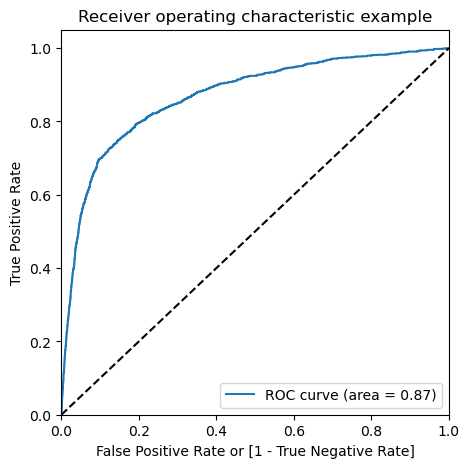

In [115]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [116]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.022720,67422,0,1,0,0,0,0,0,0,0,0,0
1,0,0.008383,65082,0,1,0,0,0,0,0,0,0,0,0
2,0,0.007916,51913,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000657,27073,0,1,0,0,0,0,0,0,0,0,0
4,0,0.009986,85427,0,1,0,0,0,0,0,0,0,0,0


In [117]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.062719  1.000000  0.000000
0.1   0.1  0.856657  0.736842  0.864674
0.2   0.2  0.922227  0.558214  0.946585
0.3   0.3  0.935381  0.345295  0.974867
0.4   0.4  0.938482  0.196970  0.988100
0.5   0.5  0.939182  0.113238  0.994450
0.6   0.6  0.938281  0.064593  0.996745
0.7   0.7  0.937681  0.027113  0.998613
0.8   0.8  0.937831  0.017544  0.999413
0.9   0.9  0.937631  0.007177  0.999893


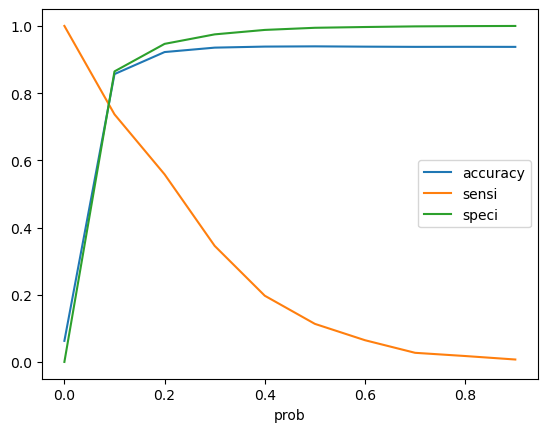

In [118]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [119]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.022720,67422,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.008383,65082,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.007916,51913,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000657,27073,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.009986,85427,0,1,0,0,0,0,0,0,0,0,0,0


In [120]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.9353806141842552

In [121]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[18269,   471],
       [  821,   433]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.3452950558213716

In [124]:
# Let us calculate specificity
TN / float(TN+FP)

0.9748665955176093

In [125]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.025133404482390608


In [126]:
# Positive predictive value 
print (TP / float(TP+FP))

0.47898230088495575


In [127]:
# Negative predictive value
print (TN / float(TN+ FN))

0.956993190151912


Precision and Recall

In [128]:
#. #Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[18636,   104],
       [ 1112,   142]], dtype=int64)

In [129]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.5772357723577236

In [130]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.11323763955342903

In [131]:
#. Precision and recall tradeoff
from sklearn.metrics import precision_score, recall_score

In [132]:
?precision_score

In [164]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5772357723577236

In [134]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.11323763955342903

In [ ]:
Precision and recall tradeoff

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 19989    0
 19990    0
 19991    0
 19992    0
 19993    1
 Name: Churn, Length: 19994, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 19989    0
 19990    0
 19991    0
 19992    0
 19993    0
 Name: predicted, Length: 19994, dtype: int64)

In [137]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

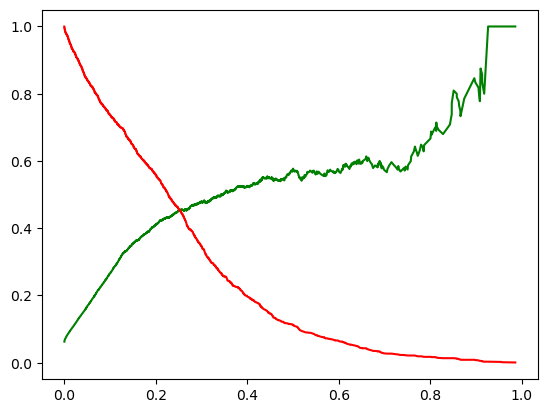

In [138]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [139]:
#. Making predictions on the test set
X_test[['Avg_Rec_Good_Phase']] = scaler.transform(X_test[['Avg_Rec_Good_Phase']])

In [140]:
X_test = X_test[col]
X_test.head()

,arpu_7,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_og_mou_8,loc_og_t2t_mou_7,loc_og_t2m_mou_6,...,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,Avg_Rec_Good_Phase,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action
59796,533.617,374.201,211.28,272.01,319.98,509.93,0.00,0.00,24.23,53.56,...,0.0,0.0,0,0,0,-0.588083,0,0,0,0
46220,592.290,521.400,840.73,689.08,239.01,394.98,0.00,0.00,74.73,28.41,...,0.0,0.0,4,5,1,-0.557635,0,0,0,0
33972,507.841,431.639,416.83,505.48,49.24,159.51,2.21,0.00,31.83,39.34,...,0.0,0.0,0,0,0,-0.701862,0,0,0,0
9177,653.619,858.468,753.01,562.99,35.43,396.63,0.00,0.00,2.83,17.53,...,0.0,0.0,0,0,0,-0.621736,0,0,0,0
2092,434.528,0.250,656.21,1.49,300.94,95.68,0.00,31.31,0.00,52.14,...,0.0,0.0,0,0,0,-0.072070,1,1,1,1


In [141]:
X_test_sm = sm.add_constant(X_test)

In [142]:
y_test_pred = res.predict(X_test_sm)

In [143]:
y_test_pred[:10]

59796    0.033184
46220    0.040955
33972    0.045247
9177     0.002129
2092     0.403852
23900    0.001486
68657    0.022432
80506    0.000405
58192    0.034324
69690    0.003007
dtype: float64

In [144]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [145]:
# Let's see the head
y_pred_1.head()

,0
59796,0.033184
46220,0.040955
33972,0.045247
9177,0.002129
2092,0.403852


In [146]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [147]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [148]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [149]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [150]:
y_pred_final.head()

,churn,CustID,0
0,0,59796,0.033184
1,0,46220,0.040955
2,0,33972,0.045247
3,0,9177,0.002129
4,0,2092,0.403852


In [151]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [152]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)

In [153]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,59796,0,0.033184
1,46220,0,0.040955
2,33972,0,0.045247
3,9177,0,0.002129
4,2092,0,0.403852


In [154]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [155]:
y_pred_final.head()

,CustID,churn,Churn_Prob,final_predicted
0,59796,0,0.033184,0
1,46220,0,0.040955,0
2,33972,0,0.045247,0
3,9177,0,0.002129,0
4,2092,0,0.403852,0


In [156]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.9376823433306103

In [157]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[7944,  103],
       [ 431,   91]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.1743295019157088

In [160]:
# Let us calculate specificity
TN / float(TN+FP)

0.9872001988318628